In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.neighbors import LocalOutlierFactor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import statsmodels.api as sm
from tabulate import tabulate
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import LabelEncoder

In [ ]:
ds = pd.read_csv("Emissions.csv")
ds2 = ds.copy()

A. 1. Histogram

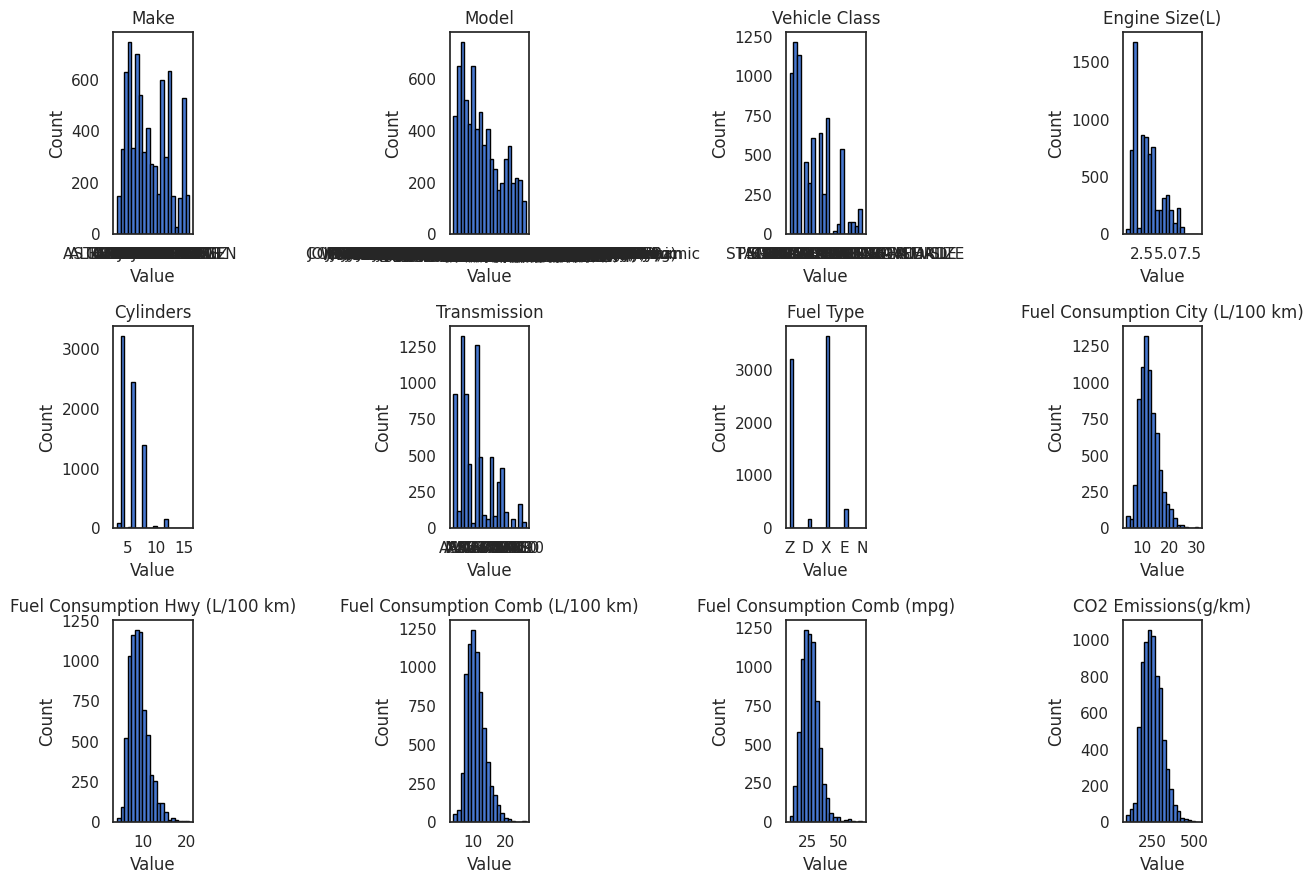

In [ ]:
figure, axis = plt.subplots(3, 4, figsize=(12, 9))  #3 rows and 4 cols for 12 histograms
axis = axis.flatten()

# Histograms for each column
for i, column in enumerate(ds.columns):
    plt.title(f'{column}', fontsize=12)
    axis[i].hist(ds[column], bins=20, edgecolor='black')
    axis[i].set_title(f'{column}')
    axis[i].set_xlabel('Value')
    axis[i].set_ylabel('Count')

plt.tight_layout()
plt.show()


A. 2. Box Plot

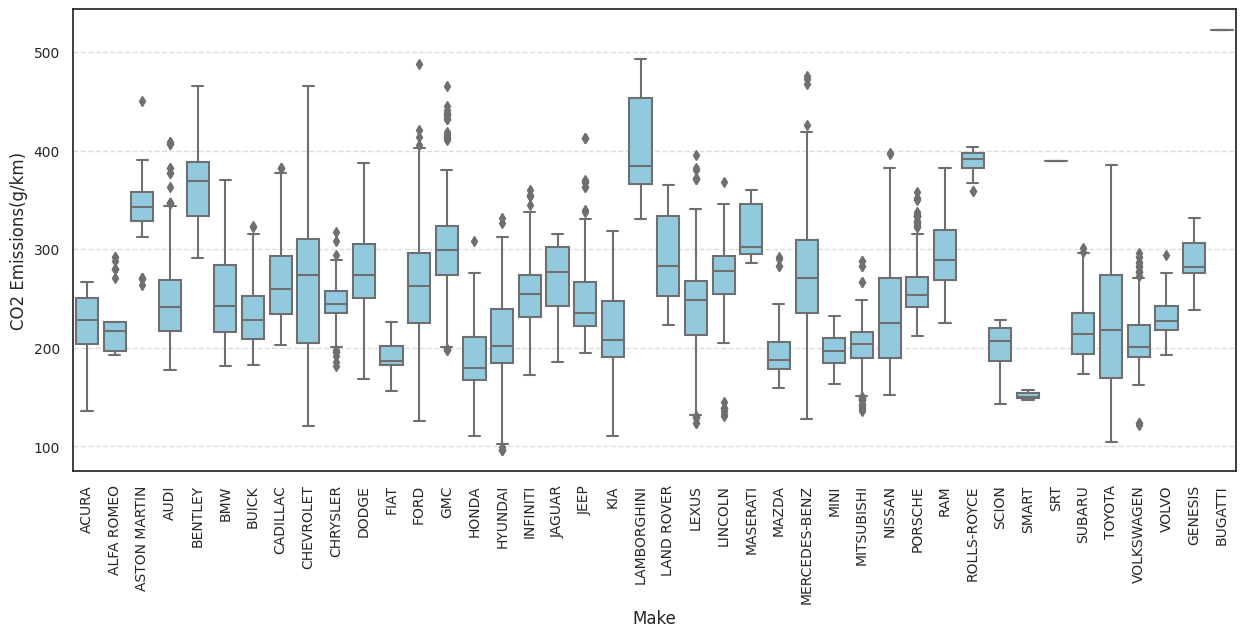

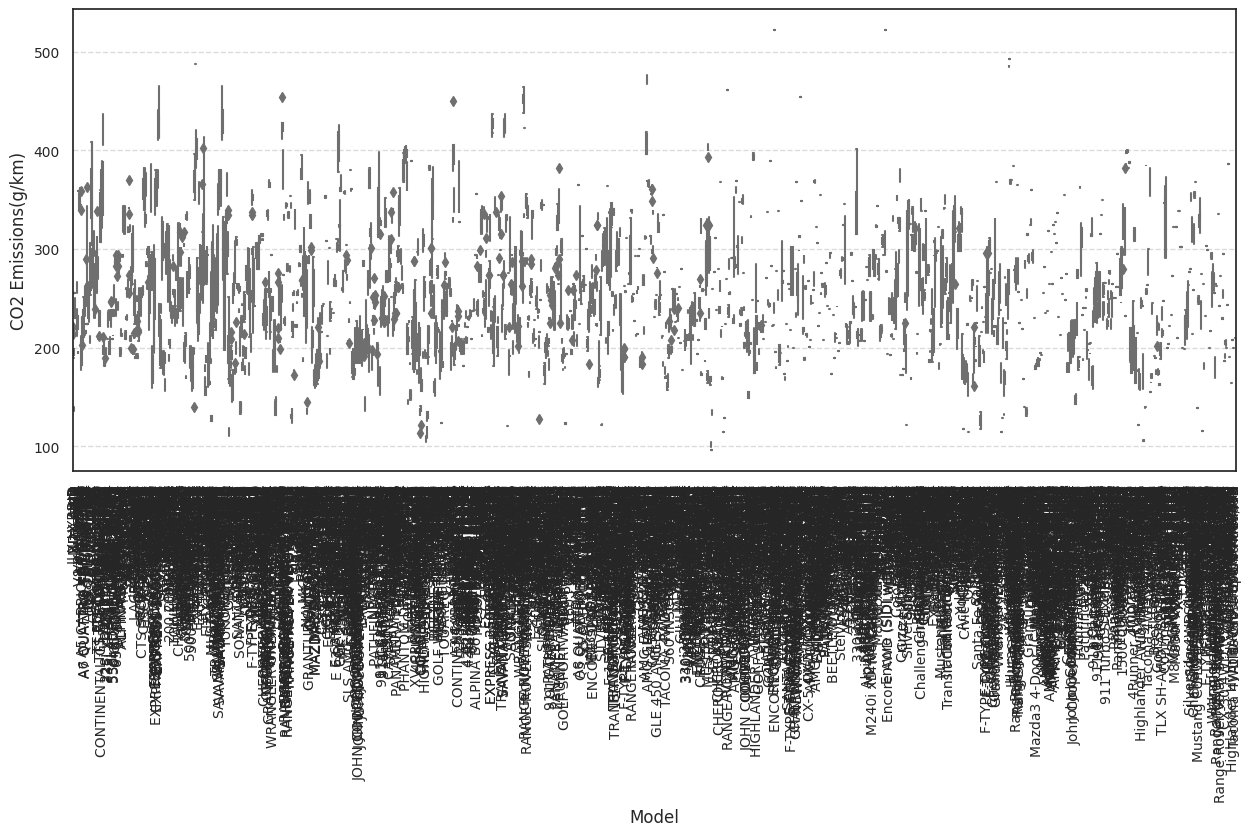

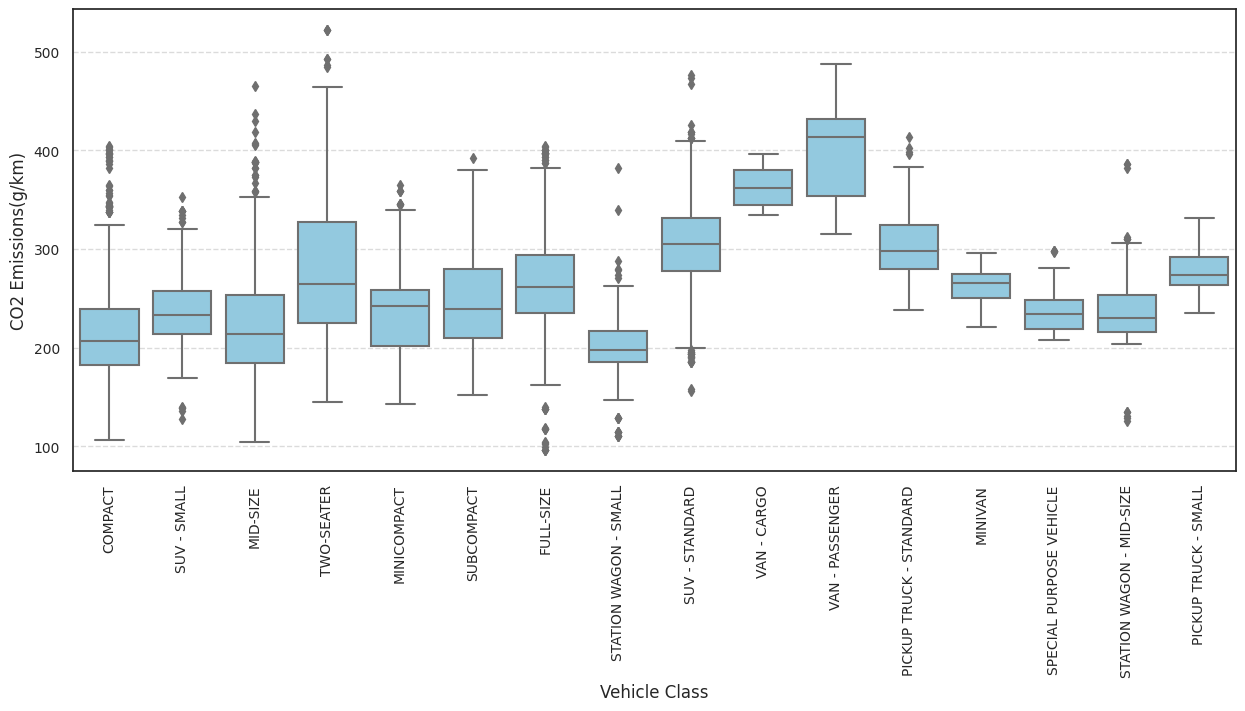

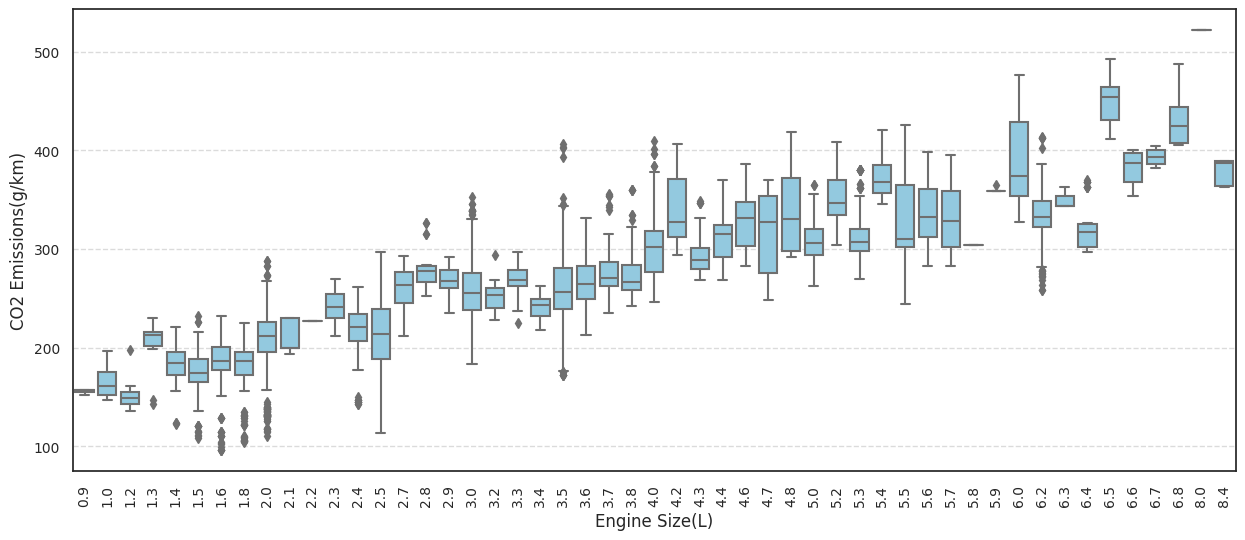

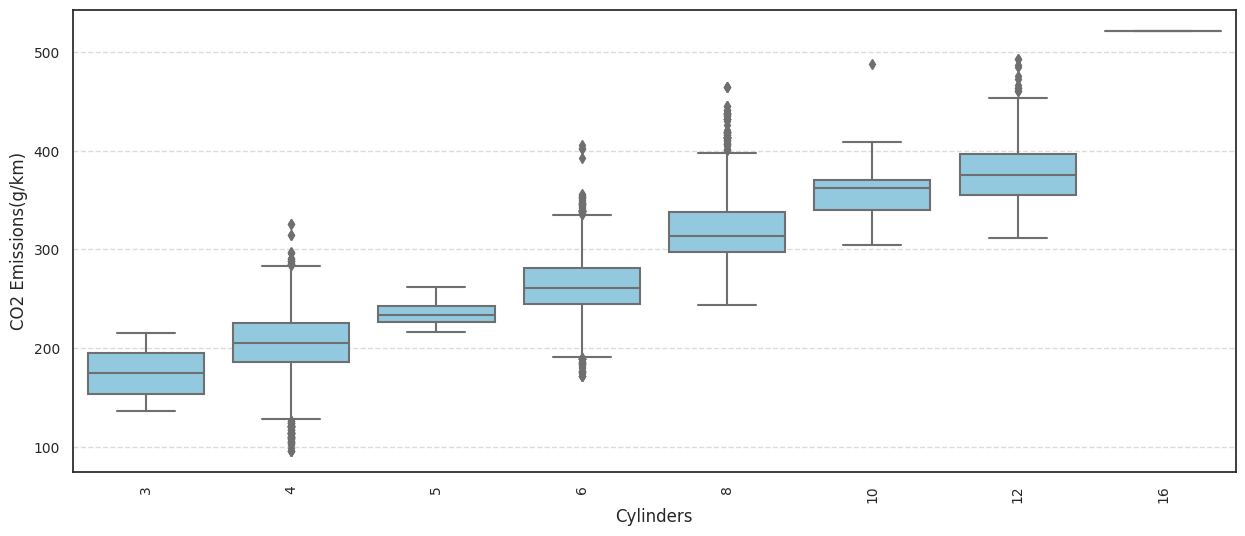

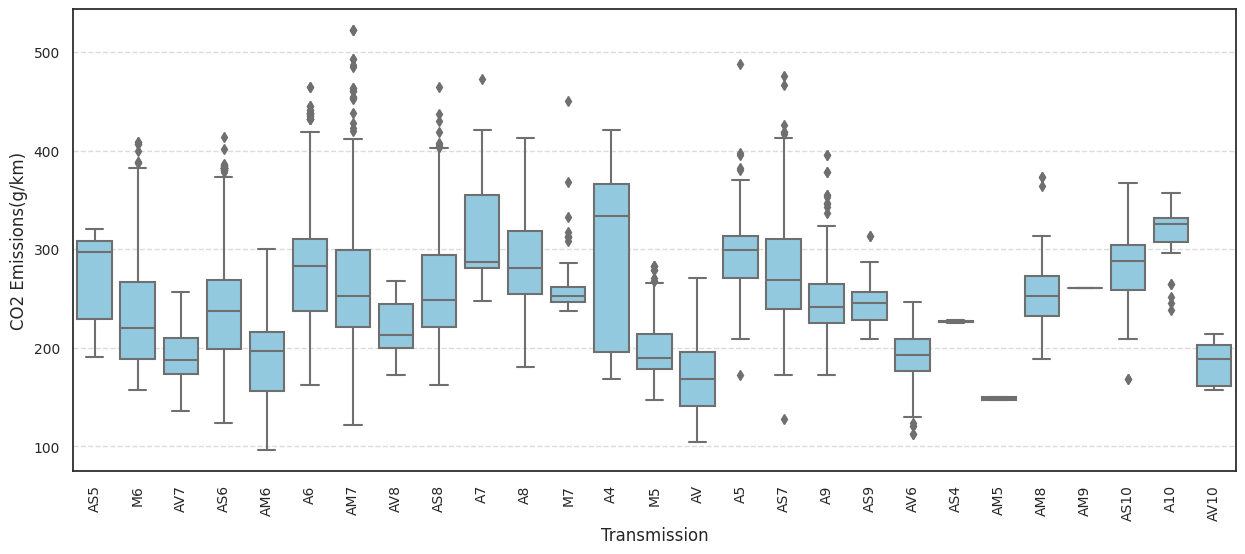

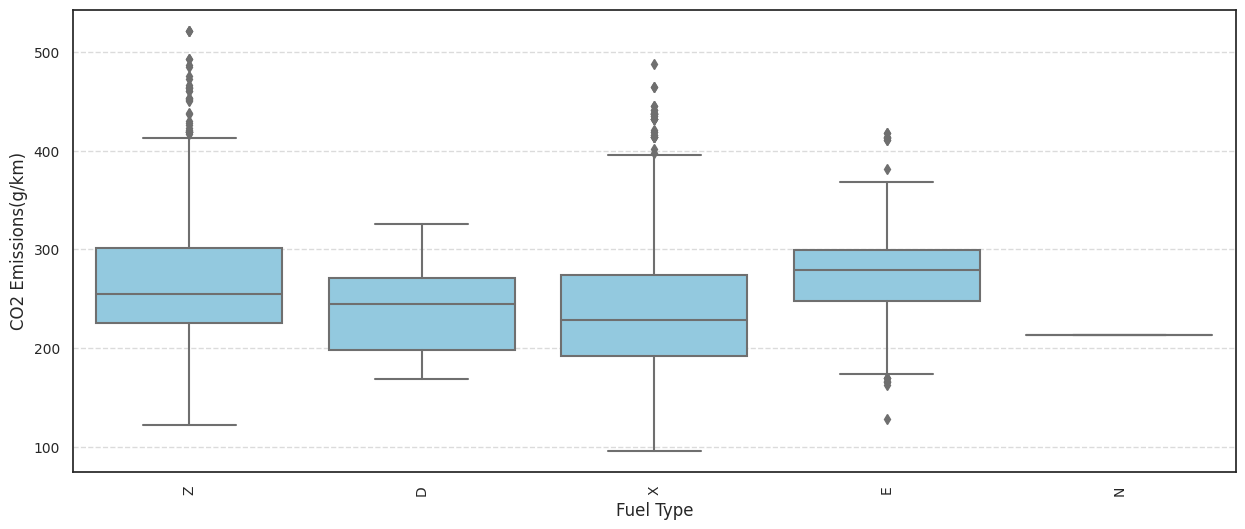

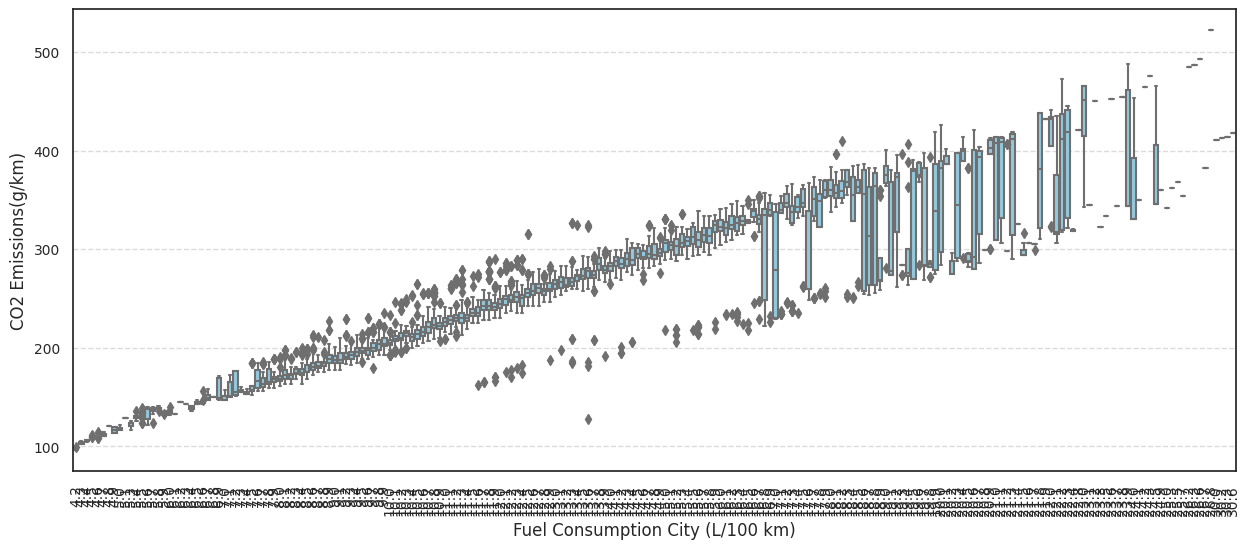

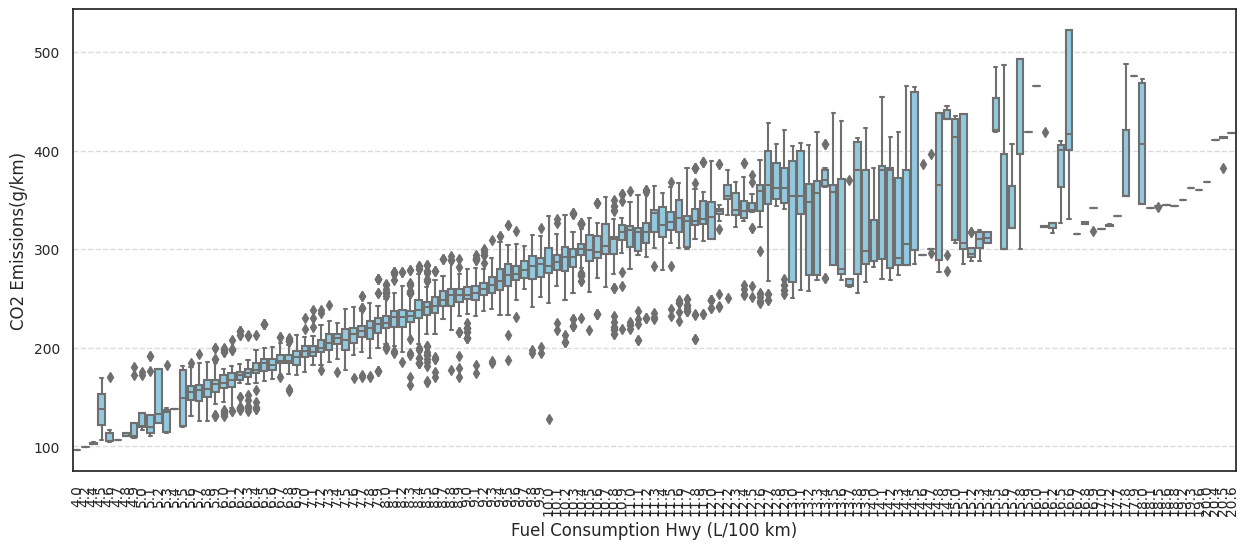

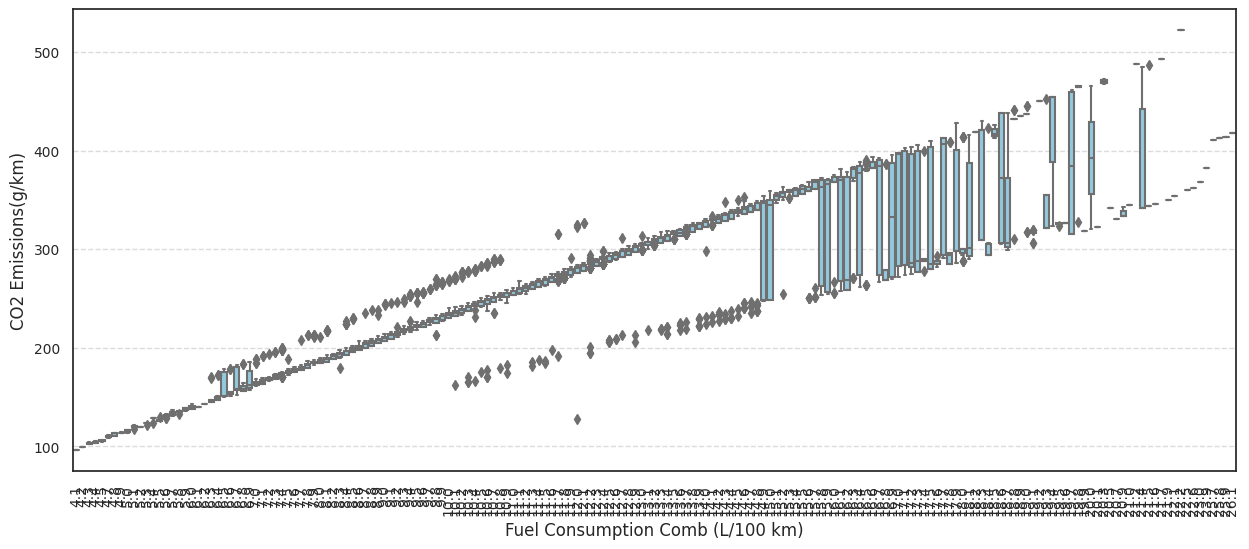

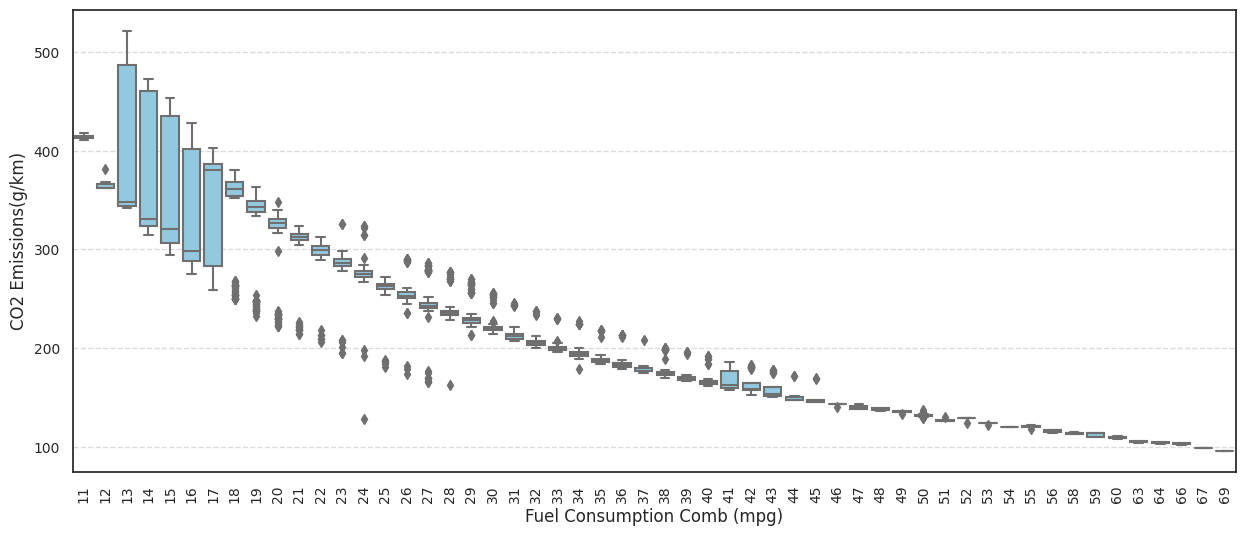

In [ ]:
columns_to_plot = ds.columns[:-1]

# Box plot for each column
for column in columns_to_plot:
    plt.figure(figsize=(15, 6))
    sns.boxplot(x=ds[column], y='CO2 Emissions(g/km)', data=ds, color='skyblue')
    plt.xlabel(column, fontsize=12)
    plt.ylabel('CO2 Emissions(g/km)', fontsize=12)
    plt.xticks(rotation=90, fontsize=10)
    plt.yticks(fontsize=10)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

A. 3. Pair Plots

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1507: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1507: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1507: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1507: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(x=vector,

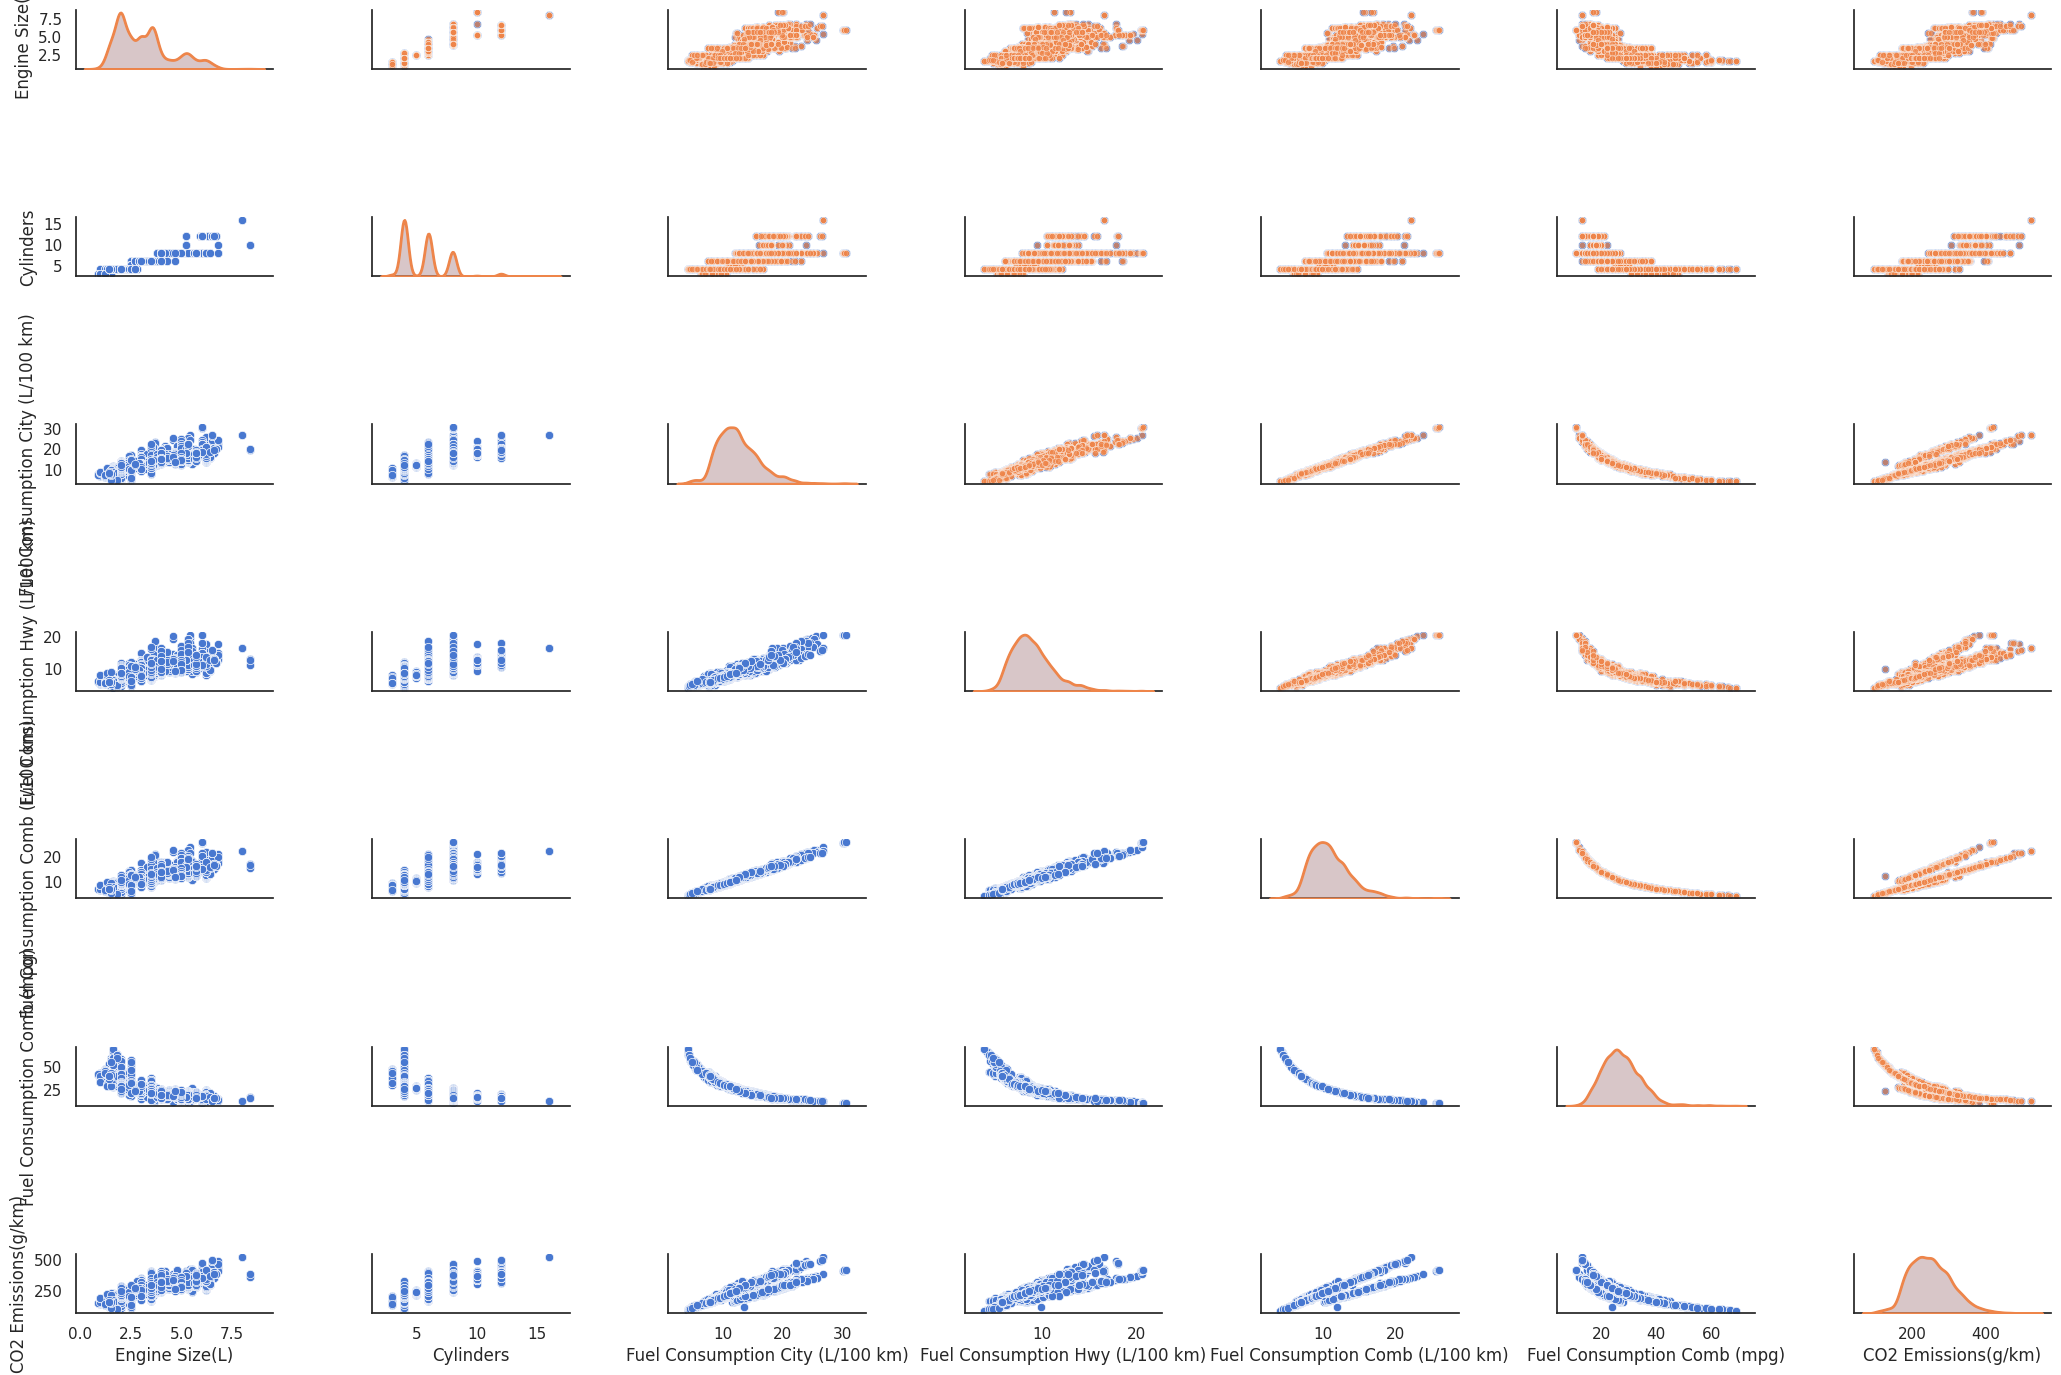

In [ ]:
sns.set(style='white', palette='muted', color_codes=True)
g = sns.pairplot(ds, diag_kind='kde', markers='o', height=2, aspect=1.5)
g.map_upper(sns.scatterplot, s=20, alpha=0.7)
g.map_diag(sns.kdeplot, lw=2, shade=True)

g.fig.subplots_adjust(hspace=2.5, wspace=0.5)
plt.show()

A. 4. Pie Chart

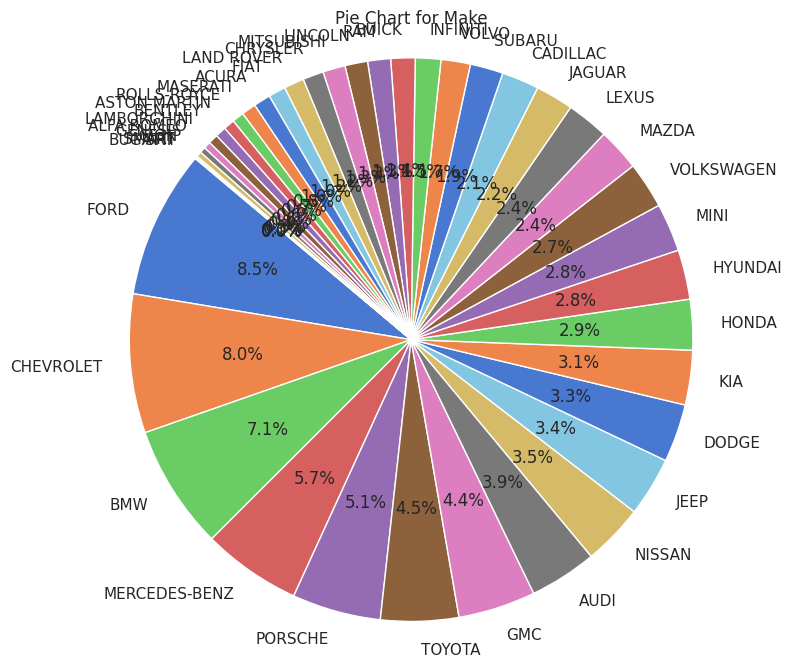

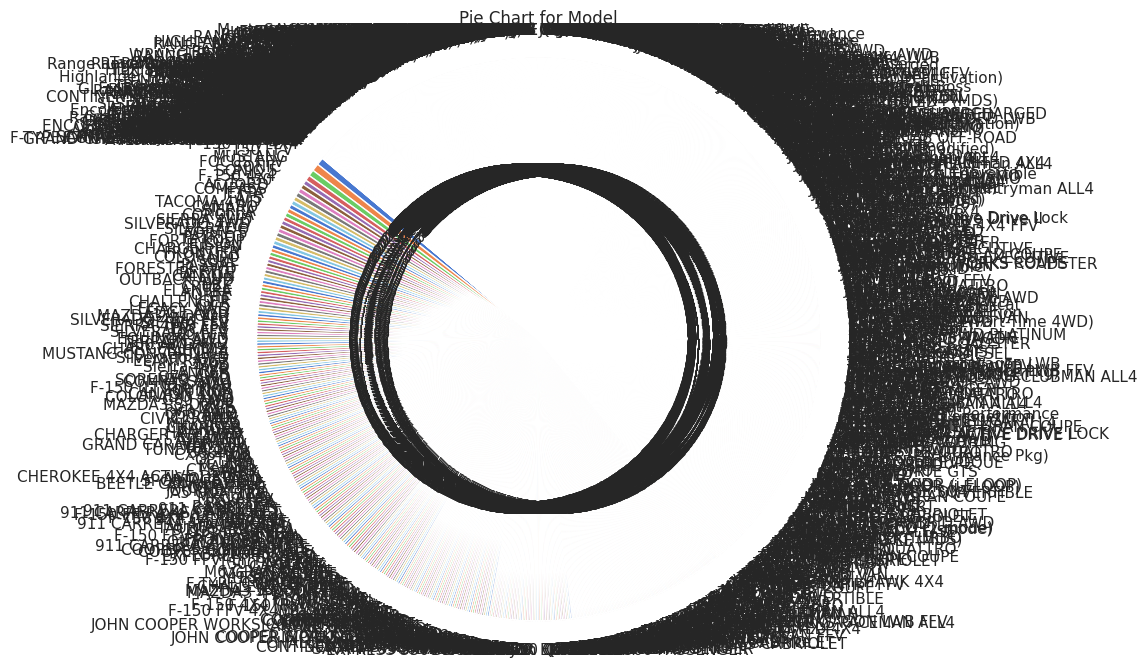

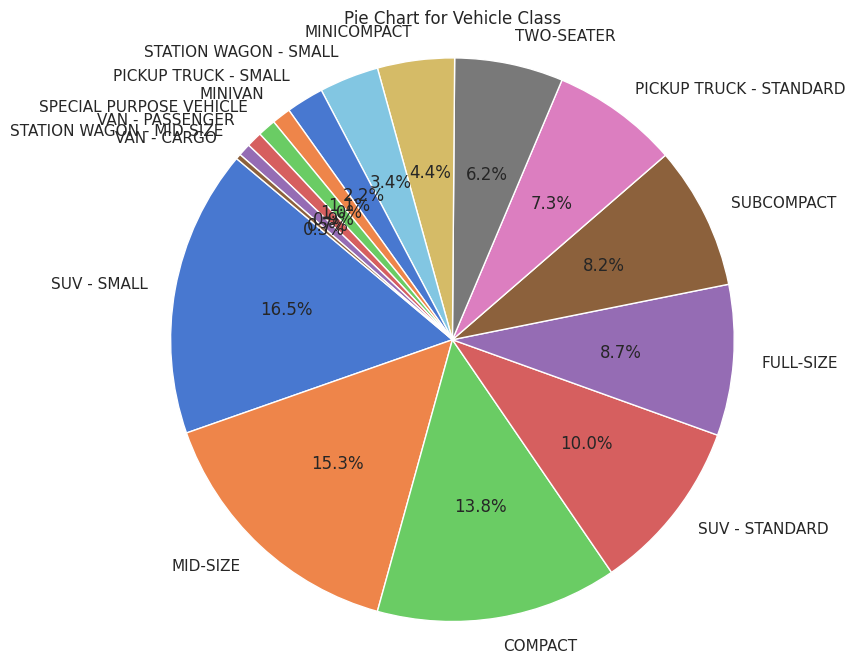

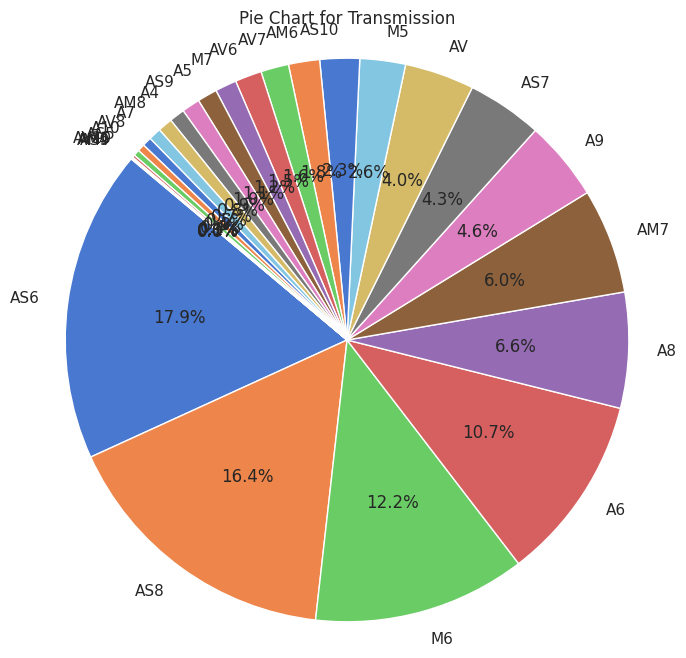

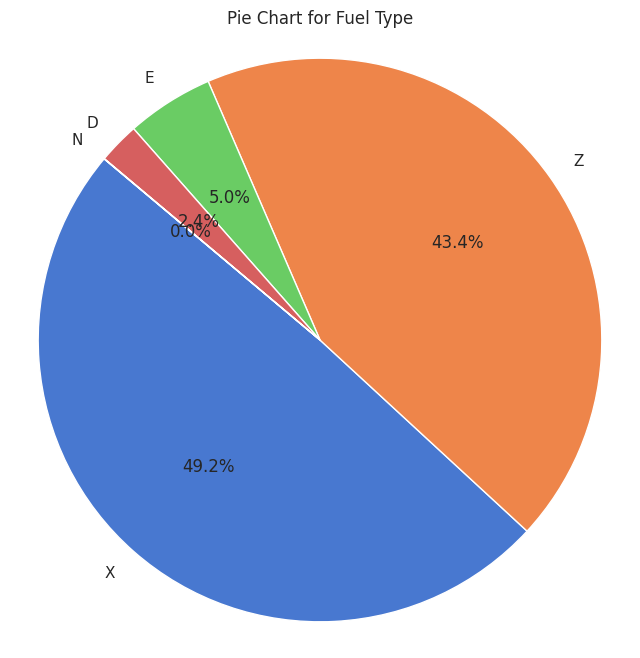

In [ ]:
for column in ds.columns:
    if ds[column].dtype == 'object':
        # Filter for columns with categorical
        value_counts = ds[column].value_counts()
        labels = value_counts.index
        sizes = value_counts.values

        # Create a pie chart
        plt.figure(figsize=(8, 8))
        plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
        plt.title(f'Pie Chart for {column}')
        plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

        # Show the pie chart
        plt.show()

A. 5. Correlation Heatmap

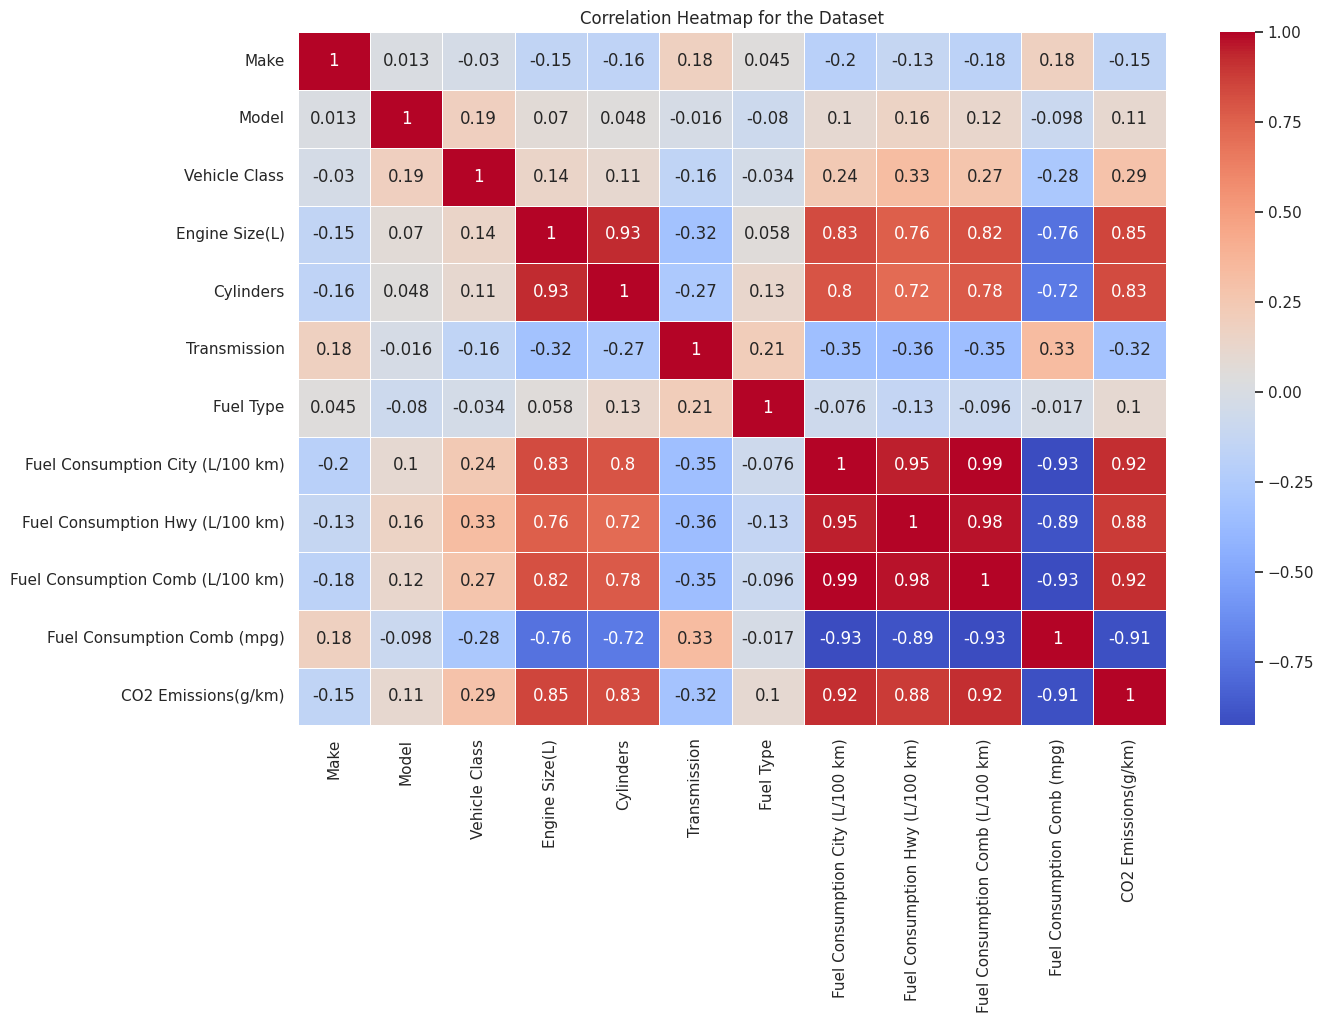

In [ ]:
columns = ['Make', 'Model', 'Vehicle Class', 'Transmission', 'Fuel Type']
ds_e = ds.copy()

label_encoder = LabelEncoder()

# Encoding
for column in columns:
    ds_e[column] = label_encoder.fit_transform(ds_e[column])

correlation_matrix = ds_e.corr()

plt.figure(figsize=(14, 9))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap for the Dataset')
plt.show()

A. 6. Scatter Plots

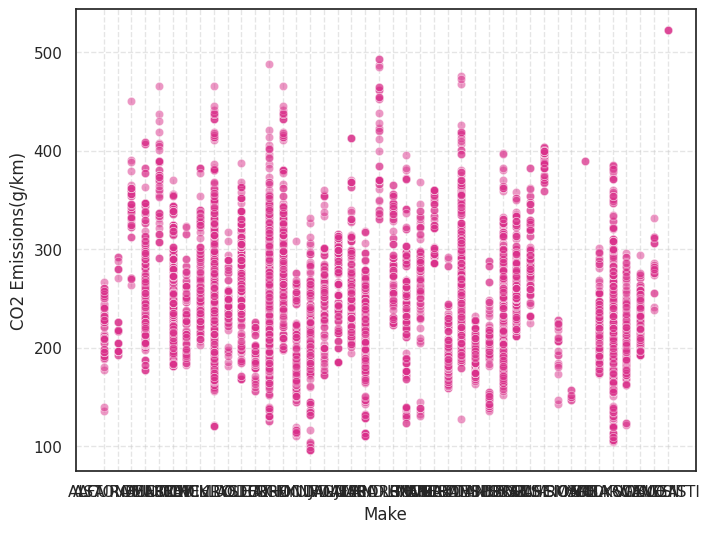

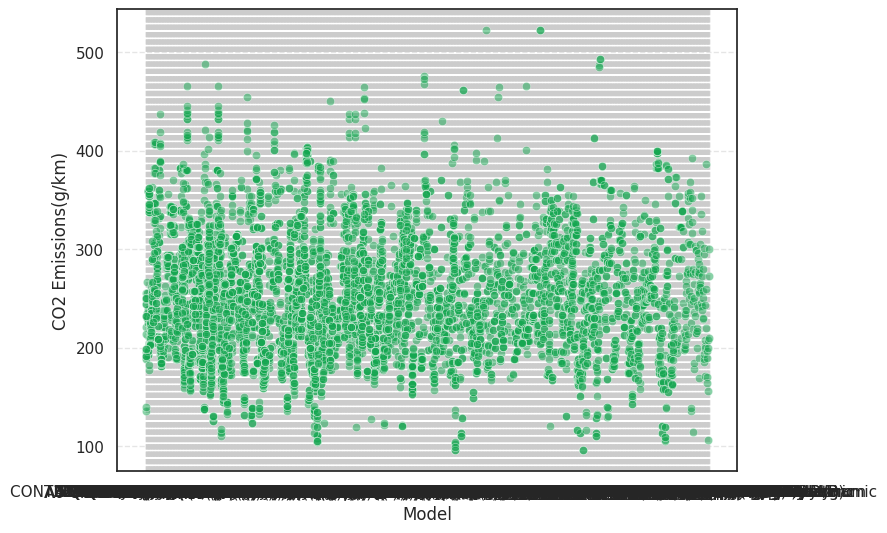

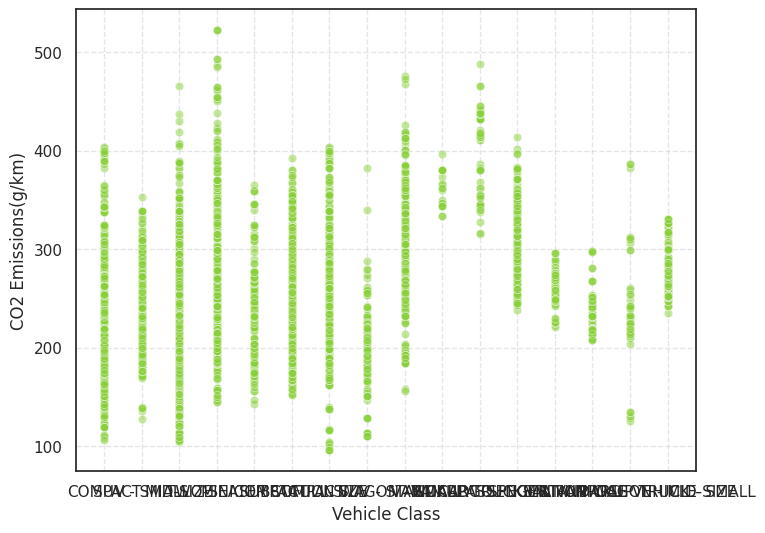

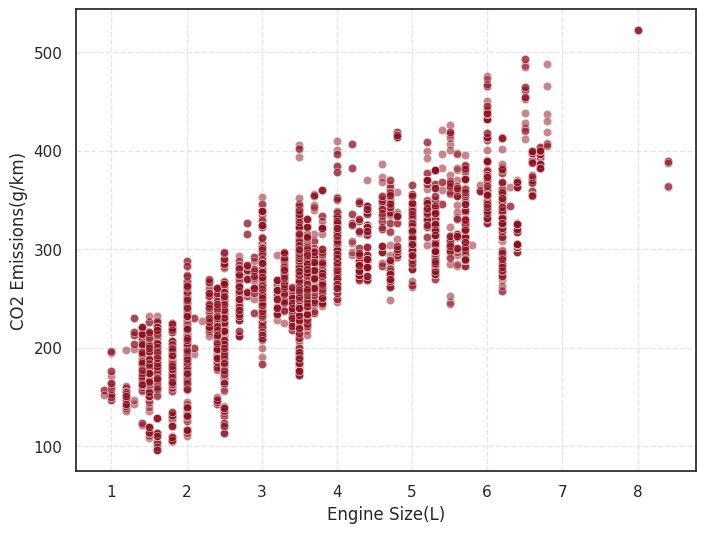

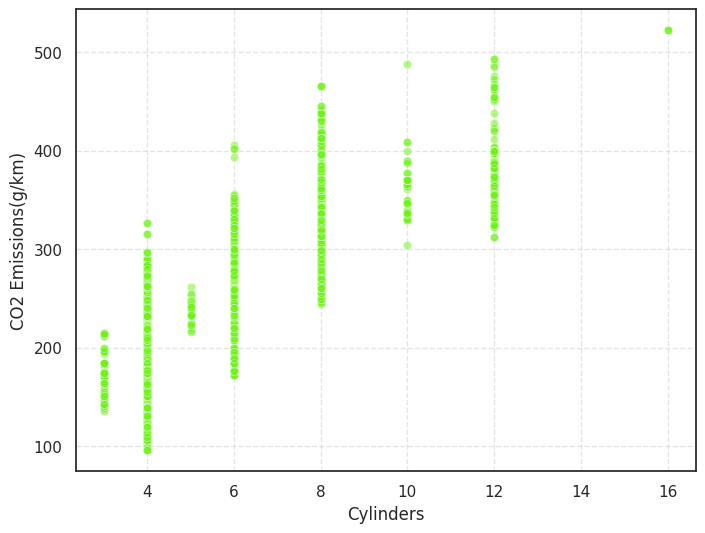

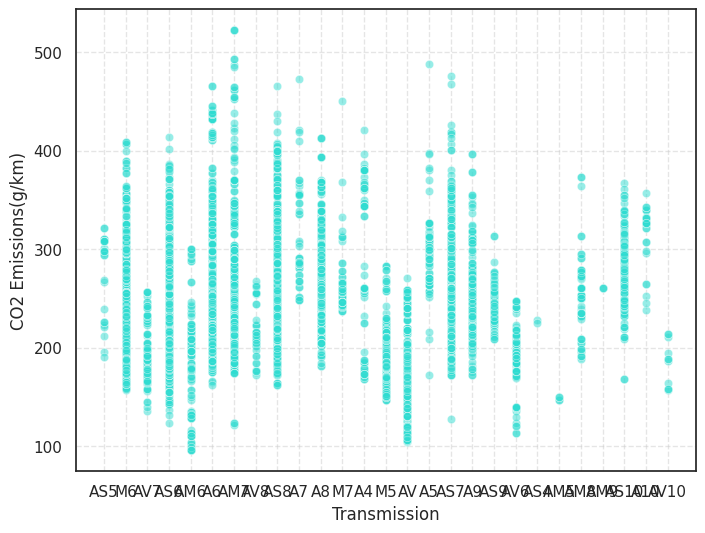

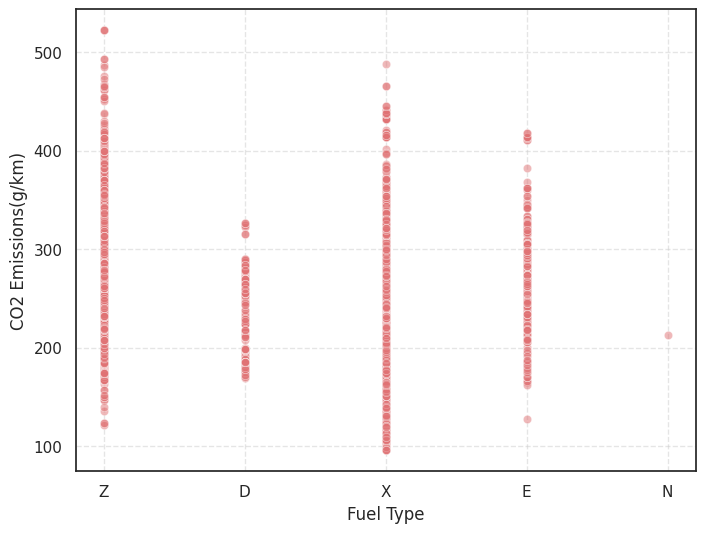

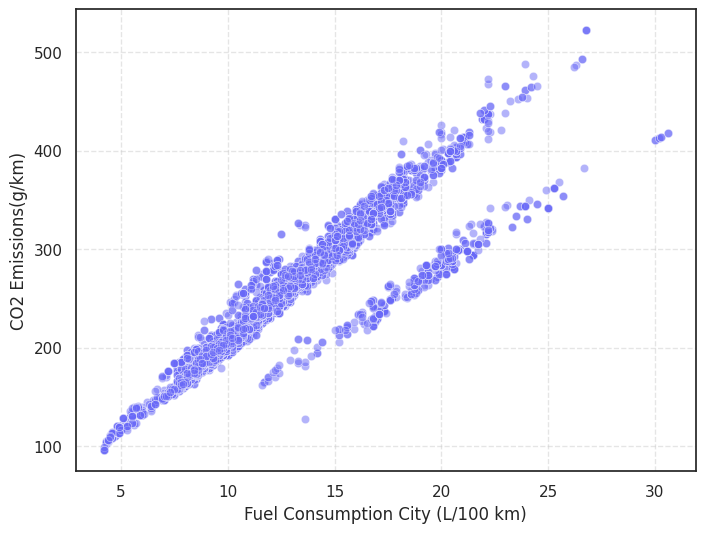

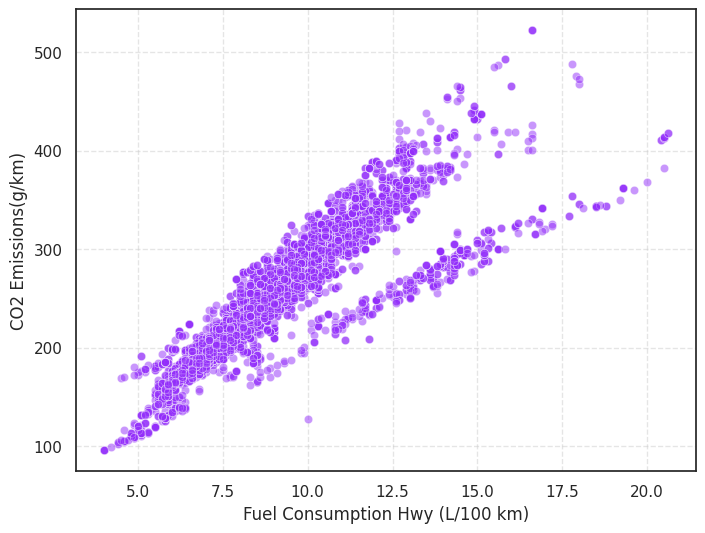

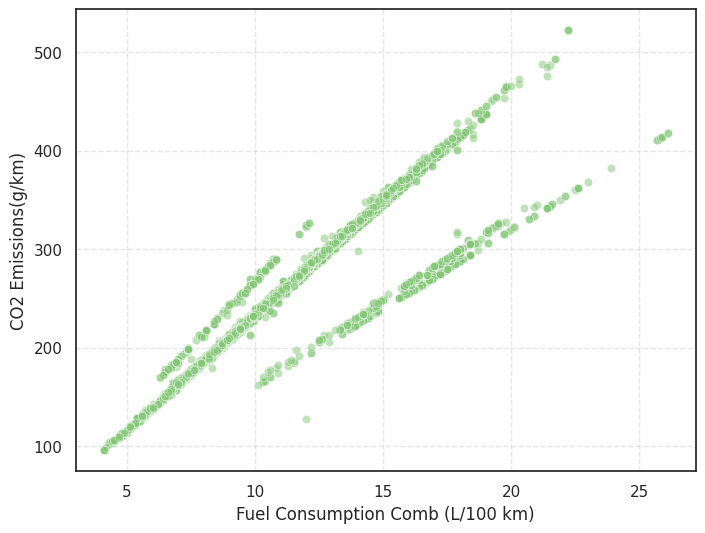

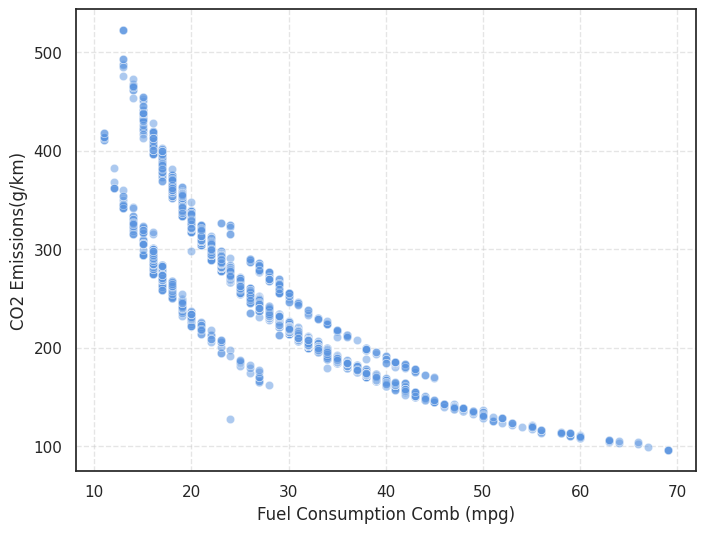

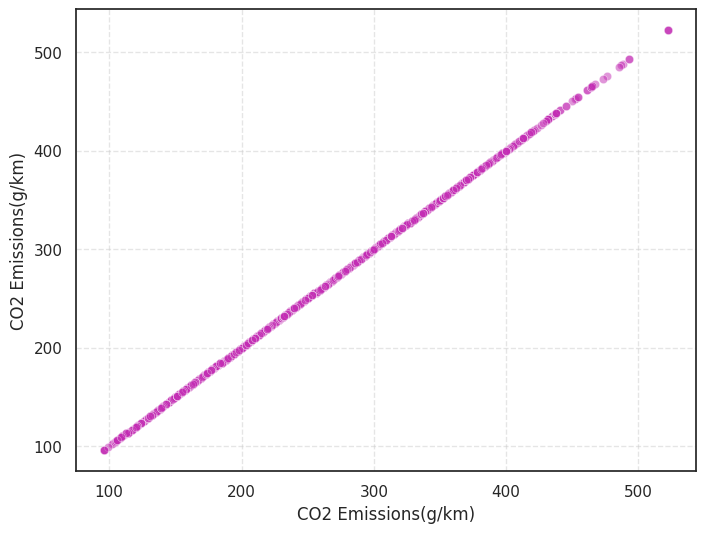

In [ ]:
columns_to_plot = ds.columns

for column in columns_to_plot:
    plt.figure(figsize=(8, 6))

    random_color = np.random.rand(3,)  # Random RGB color
    sns.scatterplot(x=ds[column], y='CO2 Emissions(g/km)', data=ds, color=random_color, alpha=0.5)

    plt.xlabel(column, fontsize=12)
    plt.ylabel('CO2 Emissions(g/km)', fontsize=12)
    plt.grid(axis='both', linestyle='--', alpha=0.5)
    plt.show()

--TSNE (t-distributed stochastic neighbour embedding)--

B. TSNE with scatter plots

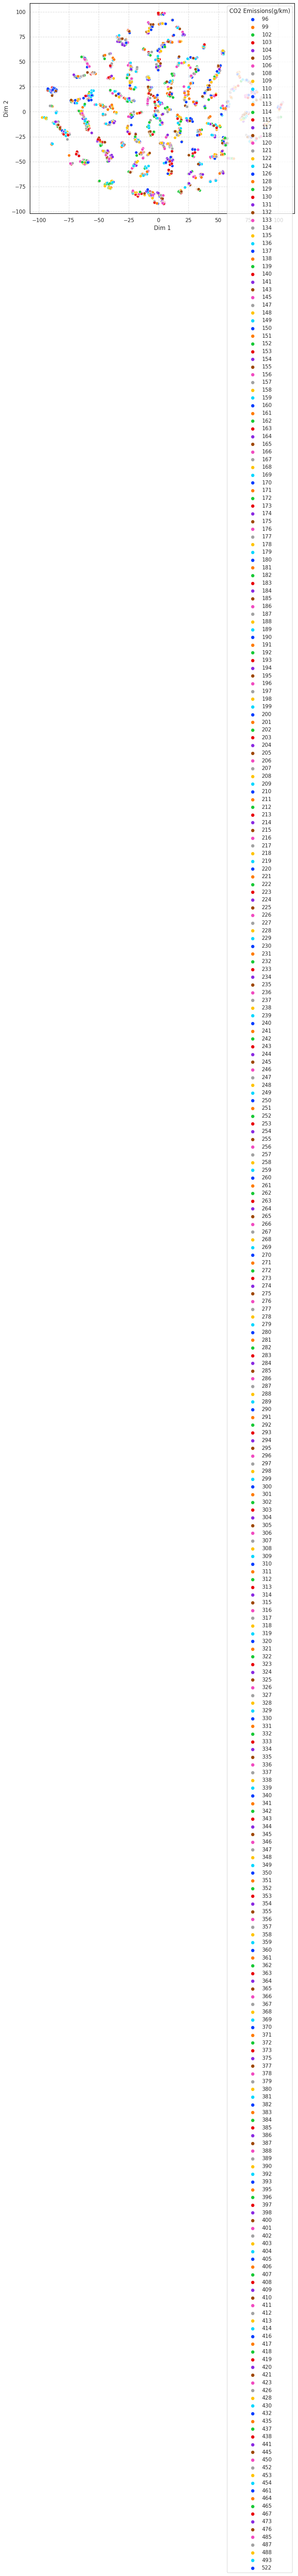

In [ ]:
ds_en = ds_e.copy()
X = ds_en.drop(columns=['CO2 Emissions(g/km)'])
y = ds_en['CO2 Emissions(g/km)']

tsne = TSNE(n_components=2, random_state=42)
X_2d = tsne.fit_transform(X)

tsne_ds = pd.DataFrame(data=X_2d, columns=['Dim 1', 'Dim 2'])

# Adding the target variable
tsne_ds['CO2 Emissions(g/km)'] = y

# Create a scatter plot of the 2D t-SNE representation
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Dim 1', y='Dim 2', hue='CO2 Emissions(g/km)', data=tsne_ds, palette='bright')
plt.xlabel('Dim 1')
plt.ylabel('Dim 2')
plt.legend(title='CO2 Emissions(g/km)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

--Pre-Processing Steps--

C. 1. Check for any missing values

In [ ]:
# Check for missing values in the entire DataFrame
missing_values = ds.isnull().sum()

for column, count in missing_values.items():
    if count > 0:
        print(f'Column: {column}, Missing Values: {count}')


C. 2. Remove the duplicates

In [ ]:
ds.drop_duplicates(inplace=True)

C. 3. Normalization of the data

In [ ]:
numerical_columns = ds.select_dtypes(include=['number'])
scaler = StandardScaler()

ds[numerical_columns.columns] = scaler.fit_transform(ds[numerical_columns.columns])

C. 4. Label Encoding

In [ ]:
ds4 = ds_e.copy()

C. 5. Remove the outliers

In [ ]:
columns_for_lof = ds4.columns[:-1]

X = ds4[columns_for_lof]

lof = LocalOutlierFactor(n_neighbors=20, contamination=0.1)
outlier_scores = lof.fit_predict(X)

ds4['LOF_Score'] = outlier_scores

ds_no_outliers = ds4[ds4['LOF_Score'] != -1]
ds_no_outliers = ds_no_outliers.drop(columns=['LOF_Score'])
ds2_no_outliers = ds_no_outliers.copy()

C. 6. Data Splitting

In [ ]:
X = ds_no_outliers.drop(columns=['CO2 Emissions(g/km)'])
y = ds_no_outliers['CO2 Emissions(g/km)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

C. Linear Regression

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
#Making predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [ ]:
# Training data
mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = np.sqrt(mse_train)
r2_train = r2_score(y_train, y_train_pred)
mae_train = mean_absolute_error(y_train, y_train_pred)



# Testing Data
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test, y_test_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)

In [ ]:
# Calculate Adjusted R2 for training data
n_train = X_train.shape[0]  # Number of samples in training data
p_train = X_train.shape[1]  # Number of features
adjusted_r2_train = 1 - ((1 - r2_train) * (n_train - 1) / (n_train - p_train - 1))

# Calculate Adjusted R2 for testing data
n_test = X_test.shape[0]  # Number of samples in testing data
p_test = X_test.shape[1]  # Number of features
adjusted_r2_test = 1 - ((1 - r2_test) * (n_test - 1) / (n_test - p_test - 1))

In [ ]:
results = {
    "Metric": ["MSE", "RMSE", "R2 Score", "Adjusted R2 Score", "MAE"],
    "Training Data": [mse_train, rmse_train, r2_train, adjusted_r2_train, mae_train],
    "Testing Data": [mse_test, rmse_test, r2_test, adjusted_r2_test, mae_test]
}

table = tabulate(results, headers="keys", tablefmt="pretty")
print(table)

+-------------------+--------------------+--------------------+
|      Metric       |   Training Data    |    Testing Data    |
+-------------------+--------------------+--------------------+
|        MSE        | 274.18083247175986 | 307.86968906440933 |
|       RMSE        | 16.55840670088037  |  17.5462158046802  |
|     R2 Score      | 0.9139939145584578 | 0.9071910099024745 |
| Adjusted R2 Score | 0.9138155459800534 | 0.9064164280427834 |
|        MAE        | 10.73776441898862  | 11.003910664669611 |
+-------------------+--------------------+--------------------+


D. PCA

In [ ]:
components = [4,6,8,10]
ds = ds4.copy()

In [ ]:
X = ds.drop(columns=['CO2 Emissions(g/km)'],axis=1)
y = ds['CO2 Emissions(g/km)']

In [ ]:
results_df = pd.DataFrame(columns=['Components', 'MSE Train', 'MSE Test', 'RMSE Train', 'RMSE Test',
                                   'R2 Train', 'R2 Test', 'Adjusted R2 Train', 'Adjusted R2 Test',
                                   'MAE Train', 'MAE Test'])

In [ ]:
numerical_columns = ds.select_dtypes(include=['number'])
scaler = StandardScaler()

ds[numerical_columns.columns] = scaler.fit_transform(ds[numerical_columns.columns])


In [ ]:
for n_components in components:
    pca = PCA(n_components=n_components,whiten=True,copy=True,svd_solver='auto',tol=0,random_state=42)
    X_pca = pca.fit_transform(X)

    X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

    # Linear regression
    model = LinearRegression(fit_intercept=True,positive=False)
    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Training data
    mse_train = mean_squared_error(y_train, y_train_pred)
    rmse_train = np.sqrt(mse_train)
    r2_train = r2_score(y_train, y_train_pred)
    mae_train = mean_absolute_error(y_train, y_train_pred)

    # Testing data
    mse_test = mean_squared_error(y_test, y_test_pred)
    rmse_test = np.sqrt(mse_test)
    r2_test = r2_score(y_test, y_test_pred)
    mae_test = mean_absolute_error(y_test, y_test_pred)

    # Adjusted R2 for training data
    n_train = X_train.shape[0]
    p_train = X_train.shape[1]
    adjusted_r2_train = 1 - ((1 - r2_train) * (n_train - 1) / (n_train - p_train - 1))

    # Adjusted R2 for testing data
    n_test = X_test.shape[0]
    p_test = X_test.shape[1]
    adjusted_r2_test = 1 - ((1 - r2_test) * (n_test - 1) / (n_test - p_test - 1))

    results_df = results_df.append({'Components': n_components,
                                    'MSE Train': mse_train,
                                    'MSE Test': mse_test,
                                    'RMSE Train': rmse_train,
                                    'RMSE Test': rmse_test,
                                    'R2 Train': r2_train,
                                    'R2 Test': r2_test,
                                    'Adjusted R2 Train': adjusted_r2_train,
                                    'Adjusted R2 Test': adjusted_r2_test,
                                    'MAE Train': mae_train,
                                    'MAE Test': mae_test}, ignore_index=True)

print(results_df)

   Components   MSE Train    MSE Test  RMSE Train  RMSE Test  R2 Train  \
0         4.0  451.101198  460.765023   21.239143  21.465438  0.868043   
1         6.0  372.518647  380.730634   19.300742  19.512320  0.891030   
2         8.0  288.444771  298.343949   16.983662  17.272636  0.915624   
3        10.0  286.256673  295.978894   16.919122  17.204037  0.916264   

    R2 Test  Adjusted R2 Train  Adjusted R2 Test  MAE Train   MAE Test  
0  0.866042           0.867954          0.865678  13.634166  13.801328  
1  0.889311           0.890919          0.888859  11.038369  11.162797  
2  0.913263           0.915509          0.912790  11.017948  11.324676  
3  0.913950           0.916122          0.913363  10.960490  11.212906  


<ipython-input-82-bc19cf4bbeb6>:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Components': n_components,
<ipython-input-82-bc19cf4bbeb6>:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Components': n_components,
<ipython-input-82-bc19cf4bbeb6>:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Components': n_components,
<ipython-input-82-bc19cf4bbeb6>:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Components': n_components,


E.

--Pre-Processing Steps--

E. 1. Check for the missing values

In [ ]:
ds = ds2.copy()

E. 2. Normalization of the data

In [ ]:
cat = ['Make', 'Model', 'Vehicle Class', 'Transmission', 'Fuel Type']

Y = ds['CO2 Emissions(g/km)']
X = ds.drop(labels=['CO2 Emissions(g/km)'],axis=1)
X_num = X.drop(labels=cat,axis=1)

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the scaler on the numerical columns
X_num_pre = pd.DataFrame(scaler.fit_transform(X_num),columns=X_num.columns)

E. 3. One hot encoding

In [ ]:
X_cat = X[cat]
X_cat_e = pd.get_dummies(data=X_cat)

X = pd.concat([X_cat_e,X_num_pre],axis=1)
print(X)
ds3 = X.copy()

      Make_ACURA  Make_ALFA ROMEO  Make_ASTON MARTIN  Make_AUDI  Make_BENTLEY  \
0              1                0                  0          0             0   
1              1                0                  0          0             0   
2              1                0                  0          0             0   
3              1                0                  0          0             0   
4              1                0                  0          0             0   
...          ...              ...                ...        ...           ...   
7380           0                0                  0          0             0   
7381           0                0                  0          0             0   
7382           0                0                  0          0             0   
7383           0                0                  0          0             0   
7384           0                0                  0          0             0   

      Make_BMW  Make_BUGATT

E. 4. Data Splitting

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

E. Linear Regression

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
#Making predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [ ]:
# Training data
mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = np.sqrt(mse_train)
r2_train = r2_score(y_train, y_train_pred)
mae_train = mean_absolute_error(y_train, y_train_pred)


# Testing Data
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test, y_test_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)

In [ ]:
# Calculate Adjusted R2 for training data
n_train = X_train.shape[0]  # Number of samples in training data
p_train = X_train.shape[1]  # Number of features
adjusted_r2_train = 1 - ((1 - r2_train) * (n_train - 1) / (n_train - p_train - 1))

# Calculate Adjusted R2 for testing data
n_test = X_test.shape[0]  # Number of samples in testing data
p_test = X_test.shape[1]  # Number of features
adjusted_r2_test = 1 - ((1 - r2_test) * (n_test - 1) / (n_test - p_test - 1))

In [ ]:
results = {
    "Metric": ["MSE", "RMSE", "R2 Score", "Adjusted R2 Score", "MAE"],
    "Training Data": [mse_train, rmse_train, r2_train, adjusted_r2_train, mae_train],
    "Testing Data": [mse_test, rmse_test, r2_test, adjusted_r2_test, mae_test]
}

table = tabulate(results, headers="keys", tablefmt="pretty")
print(table)

+-------------------+--------------------+-------------------------+
|      Metric       |   Training Data    |      Testing Data       |
+-------------------+--------------------+-------------------------+
|        MSE        | 8.534818957381319  |  6.221142204925232e+19  |
|       RMSE        | 2.921441246607797  |    7887421761.846663    |
|     R2 Score      | 0.9975033811381525 | -1.8086674674817508e+16 |
| Adjusted R2 Score | 0.9960756978134824 | 3.9667060653834536e+16  |
|        MAE        | 1.8703274168351574 |    1551013140.415223    |
+-------------------+--------------------+-------------------------+


F. PCA on One-Hot Encoded Data

In [ ]:
components = [4,5,6,8,10]
ds = ds3.copy()

In [ ]:
X = ds.copy()
y = Y.copy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
results_df = pd.DataFrame(columns=['Components', 'MSE Train', 'MSE Test', 'RMSE Train', 'RMSE Test',
                                   'R2 Train', 'R2 Test', 'Adjusted R2 Train', 'Adjusted R2 Test',
                                   'MAE Train', 'MAE Test'])

In [ ]:
for n_components in components:

    pca = PCA(n_components=n_components,whiten=True,copy=True,svd_solver='auto',tol=0,random_state=42)
    X_pca = pca.fit_transform(X)

    X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

    # Linear regression
    model = LinearRegression(fit_intercept=True,positive=False)
    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Training data
    mse_train = mean_squared_error(y_train, y_train_pred)
    rmse_train = np.sqrt(mse_train)
    r2_train = r2_score(y_train, y_train_pred)
    mae_train = mean_absolute_error(y_train, y_train_pred)

    # Testing data
    mse_test = mean_squared_error(y_test, y_test_pred)
    rmse_test = np.sqrt(mse_test)
    r2_test = r2_score(y_test, y_test_pred)
    mae_test = mean_absolute_error(y_test, y_test_pred)

    # Adjusted R2 for training data
    n_train = X_train.shape[0]
    p_train = X_train.shape[1]
    adjusted_r2_train = 1 - ((1 - r2_train) * (n_train - 1) / (n_train - p_train - 1))

    # Adjusted R2 for testing data
    n_test = X_test.shape[0]
    p_test = X_test.shape[1]
    adjusted_r2_test = 1 - ((1 - r2_test) * (n_test - 1) / (n_test - p_test - 1))

    results_df = results_df.append({'Components': n_components,
                                    'MSE Train': mse_train,
                                    'MSE Test': mse_test,
                                    'RMSE Train': rmse_train,
                                    'RMSE Test': rmse_test,
                                    'R2 Train': r2_train,
                                    'R2 Test': r2_test,
                                    'Adjusted R2 Train': adjusted_r2_train,
                                    'Adjusted R2 Test': adjusted_r2_test,
                                    'MAE Train': mae_train,
                                    'MAE Test': mae_test}, ignore_index=True)

print(results_df)

<ipython-input-95-377167836278>:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Components': n_components,
<ipython-input-95-377167836278>:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Components': n_components,
<ipython-input-95-377167836278>:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Components': n_components,
<ipython-input-95-377167836278>:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Components': n_components,


   Components   MSE Train    MSE Test  RMSE Train  RMSE Test  R2 Train  \
0         4.0  335.100744  340.675555   18.305757  18.457398  0.901976   
1         5.0  332.296609  337.894311   18.229005  18.381902  0.902796   
2         6.0  325.924084  331.999090   18.053368  18.220842  0.904660   
3         8.0  309.941251  322.081968   17.605148  17.946642  0.909335   
4        10.0  308.584407  320.986894   17.566571  17.916107  0.909732   

    R2 Test  Adjusted R2 Train  Adjusted R2 Test  MAE Train   MAE Test  
0  0.900956           0.901909          0.900687  11.950279  11.870733  
1  0.901764           0.902714          0.901430  11.906866  11.833885  
2  0.903478           0.904563          0.903084  11.970890  11.856524  
3  0.906361           0.909213          0.905851  11.531490  11.734342  
4  0.906680           0.909579          0.906043  11.500865  11.704957  


<ipython-input-95-377167836278>:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Components': n_components,


G. Regularization

L1 Regularization

In [ ]:
ds = ds4.copy()

X = ds4.drop(columns=['CO2 Emissions(g/km)'])
y = ds4['CO2 Emissions(g/km)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
a = 0.0001
model = Lasso(alpha=a)
model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.316e+05, tolerance: 2.020e+03
  model = cd_fast.enet_coordinate_descent(


In [ ]:
print("Training Data:")
print(f"MSE: {mean_squared_error(y_train, y_train_pred)}" )
print(f"RMSE: {mean_squared_error(y_train, y_train_pred, squared=False)}")
print(f"R2 Score: {r2_score(y_train, y_train_pred)}")
print(f"MAE: {mean_absolute_error(y_train, y_train_pred)}")

print("\nTesting Data:")
print(f"MSE: {mean_squared_error(y_test, y_test_pred)}")
print(f"RMSE: {mean_squared_error(y_test, y_test_pred, squared=False)}")
print(f"R2 Score: {r2_score(y_test, y_test_pred)}")
print(f"MAE: {mean_absolute_error(y_test, y_test_pred)}")

Training Data:
MSE: 285.8391473834993
RMSE: 16.90677814911816
R2 Score: 0.9163858764461709
MAE: 10.96561560552965

Testing Data:
MSE: 296.03340291570106
RMSE: 17.205621259219356
R2 Score: 0.9139344564865189
MAE: 11.196485397785933


L2 Regularization

In [ ]:
ds = ds4.copy()

X = ds4.drop(columns=['CO2 Emissions(g/km)'])
y = ds4['CO2 Emissions(g/km)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
a = 0.0001
model = Ridge(alpha=a)
model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [ ]:
print("Training Data:")
print(f"MSE: {mean_squared_error(y_train, y_train_pred)}" )
print(f"RMSE: {mean_squared_error(y_train, y_train_pred, squared=False)}")
print(f"R2 Score: {r2_score(y_train, y_train_pred)}")
print(f"MAE: {mean_absolute_error(y_train, y_train_pred)}")

print("\nTesting Data:")
print(f"MSE: {mean_squared_error(y_test, y_test_pred)}")
print(f"RMSE: {mean_squared_error(y_test, y_test_pred, squared=False)}")
print(f"R2 Score: {r2_score(y_test, y_test_pred)}")
print(f"MAE: {mean_absolute_error(y_test, y_test_pred)}")

Training Data:
MSE: 285.75176878184664
RMSE: 16.90419382229885
R2 Score: 0.9164114365741709
MAE: 10.962126267804814

Testing Data:
MSE: 295.80267386628753
RMSE: 17.198914903745745
R2 Score: 0.9140015361499845
MAE: 11.190160930794667


H. SGDRegressor

In [ ]:
ds = ds4.copy()

X = ds4.drop(columns=['CO2 Emissions(g/km)'])
y = ds4['CO2 Emissions(g/km)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
a = 1
model = SGDRegressor(penalty='l2', alpha=a, random_state=42)
model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [ ]:
print("Training Data:")
print(f"MSE: {mean_squared_error(y_train, y_train_pred)}" )
print(f"RMSE: {mean_squared_error(y_train, y_train_pred, squared=False)}")
print(f"R2 Score: {r2_score(y_train, y_train_pred)}")
print(f"MAE: {mean_absolute_error(y_train, y_train_pred)}")

print("\nTesting Data:")
print(f"MSE: {mean_squared_error(y_test, y_test_pred)}")
print(f"RMSE: {mean_squared_error(y_test, y_test_pred, squared=False)}")
print(f"R2 Score: {r2_score(y_test, y_test_pred)}")
print(f"MAE: {mean_absolute_error(y_test, y_test_pred)}")

Training Data:
MSE: 3.246659288905697e+29
RMSE: 569794637470878.4
R2 Score: -9.497179564264925e+25
MAE: 495164485125612.56

Testing Data:
MSE: 3.252318851217157e+29
RMSE: 570291052991115.9
R2 Score: -9.45543938123946e+25
MAE: 496581529004706.94
